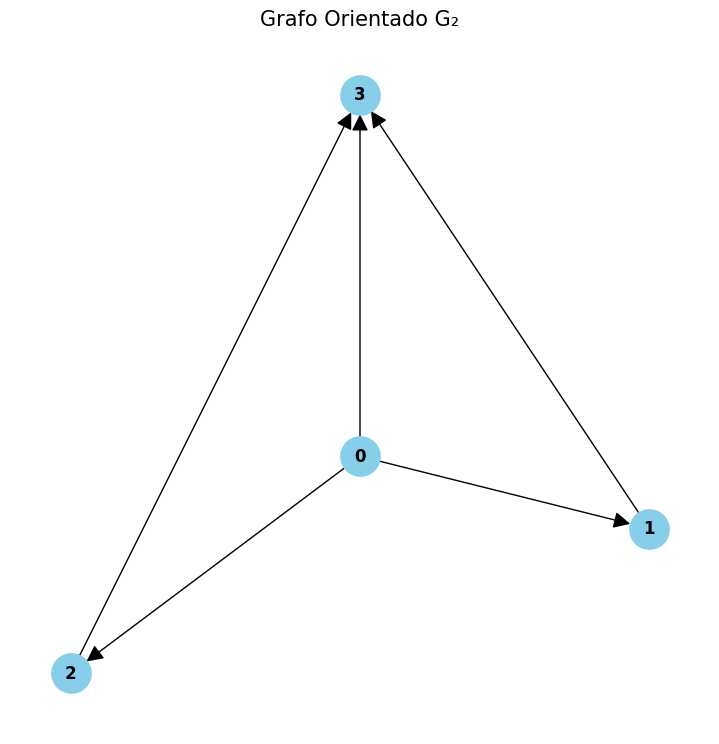

In [16]:
# GRAFO ORIENTADO

import networkx as nx
import matplotlib.pyplot as plt

# 1. Criar um objeto de Grafo Orientado (DiGraph)
G2 = nx.DiGraph()

# 2. Definir e adicionar os vértices (nós)
vertices = [0, 1, 2, 3]
G2.add_nodes_from(vertices)

# 3. Definir e adicionar os arcos (arestas direcionadas)
arcos = [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]
G2.add_edges_from(arcos)

# 4. Definir a posição dos nós para replicar a imagem
# Este passo é opcional, mas ajuda a manter a mesma aparência visual.
pos = {0: (0.4, 0.3), 1: (0.8, 0.2), 2: (0, 0), 3: (0.4, 0.8)}

# 5. Desenhar e exibir o grafo
plt.figure(figsize=(7, 7)) # Define o tamanho da imagem gerada

nx.draw(G2,
        pos,
        with_labels=True,      # Mostra os números dos nós
        node_color='skyblue',  # Define a cor dos nós
        node_size=800,         # Define o tamanho dos nós
        font_size=12,          # Define o tamanho da fonte
        font_weight='bold',    # Deixa a fonte em negrito
        arrowsize=25)          # Define o tamanho da seta

plt.title("Grafo Orientado G₂", size=15)
plt.show()

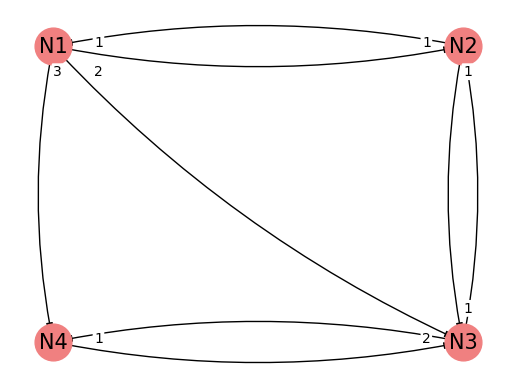

In [ ]:
# GRAFO ORDENADO

import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# ETAPA 1: Definição do Grafo Exato da Imagem
# -----------------------------------------------------------------------------

# Usaremos um Grafo Direcionado (DiGraph)
grafo_final = nx.DiGraph()

# Lista de arestas e pesos exatamente como na imagem
# (origem, destino, peso)
arestas_do_grafo_final = [
    ('N1', 'N2', 1), ('N2', 'N1', 1),
    ('N1', 'N3', 2), # Aresta reta
    ('N1', 'N4', 3),
    ('N2', 'N3', 1), ('N3', 'N2', 1),
    ('N3', 'N4', 1), ('N4', 'N3', 1),
    ('N4', 'N1', 1)
]

# Adiciona todas as arestas com seus pesos ao grafo
grafo_final.add_weighted_edges_from(arestas_do_grafo_final)


# -----------------------------------------------------------------------------
# ETAPA 2: Visualização Fiel à Imagem
# -----------------------------------------------------------------------------
print("Gerando a visualização do grafo da imagem...")

# Define as coordenadas exatas dos nós para o layout
posicoes = {'N1': (0, 1), 'N2': (1.5, 1), 'N3': (1.5, 0), 'N4': (0, 0)}

# Configura a figura
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_title("Grafo Gerado a Partir da Imagem")

# Desenha os nós e seus rótulos
nx.draw_networkx_nodes(grafo_final, posicoes, node_size=2500, node_color='#F08080') # LightCoral
nx.draw_networkx_labels(grafo_final, posicoes, font_size=16, font_weight='bold')

# Separa as arestas em retas e curvas para um desenho preciso
arestas_retas = [('N1', 'N3')]
arestas_curvas = [edge for edge in grafo_final.edges() if edge not in arestas_retas]

# Desenha a aresta reta
nx.draw_networkx_edges(grafo_final, posicoes, edgelist=arestas_retas, arrowsize=25, node_size=2500)

# Desenha as arestas curvas
nx.draw_networkx_edges(
    grafo_final,
    posicoes,
    edgelist=arestas_curvas,
    connectionstyle='arc3, rad=0.2',
    arrowsize=25,
    node_size=2500
)

# Desenha os rótulos de peso (weights)
rotulos_das_arestas = nx.get_edge_attributes(grafo_final, 'weight')
nx.draw_networkx_edge_labels(
    grafo_final,
    posicoes,
    edge_labels=rotulos_das_arestas,
    label_pos=0.5,
    font_size=12
)

plt.axis('off')
plt.show() # O script pausa aqui até você fechar a janela do gráfico


# -----------------------------------------------------------------------------
# ETAPA 3: Análise de Caminhos e Ciclos no Grafo Final
# -----------------------------------------------------------------------------
print("\n=============================================")
print("ANÁLISE DO GRAFO GERADO PELA IMAGEM")
print("=============================================\n")

# 1. Encontrando caminhos simples entre 'N1' e 'N3'
print("Caminhos simples de 'N1' para 'N3':")
for caminho in nx.all_simple_paths(grafo_final, source='N1', target='N3'):
    print(caminho)

print("-" * 30)

# 2. Verificando a existência de ciclos
is_acyclic = nx.is_directed_acyclic_graph(grafo_final)
print(f"O grafo da imagem é acíclico? {'Sim' if is_acyclic else 'Não'}")

print("-" * 30)

# 3. Identificando um ciclo (se houver)
try:
    ciclo_encontrado = nx.find_cycle(grafo_final)
    print("Um ciclo encontrado no grafo:", ciclo_encontrado)
except nx.NetworkXNoCycle:
    print("O grafo da imagem é acíclico.")

In [18]:
# FUNÇÃO PARA ENCONTRAR VÉRTICES-BASE/RAIZ E VÉRTICES-FOLHA
# UTILIZEI O MESMO EXEMPLO ANTERIOR (GRAFO ORDENADO)

import networkx as nx

def determinar_nos_terminais(grafo_a_verificar):
    """
    Identifica os nós que são pontos de partida (fontes) ou de chegada (sumidouros) em um grafo.

    Args:
        grafo_a_verificar (nx.DiGraph): O grafo direcionado a ser analisado.

    Returns:
        tuple: Uma tupla contendo duas listas: (nós_fonte, nós_sumidouro).
    """
    # Implementação com laço 'for' para um estilo diferente:
    nos_fonte = []
    for no, grau_de_entrada in grafo_a_verificar.in_degree():
        if grau_de_entrada == 0:
            nos_fonte.append(no)

    nos_sumidouro = []
    for no, grau_de_saida in grafo_a_verificar.out_degree():
        if grau_de_saida == 0:
            nos_sumidouro.append(no)

    return nos_fonte, nos_sumidouro


def executar_analise_de_grafo():
    
    # Função principal que constrói um grafo, o analisa e exibe os resultados.
    
    # --- ETAPA 1: Construção do Grafo de forma alternativa ---
    
    # Define a estrutura do grafo como uma lista de arestas com peso
    lista_de_arestas_com_peso = [
        ('N1', 'N2', 1), ('N2', 'N1', 1), ('N1', 'N3', 2),
        ('N1', 'N4', 3), ('N3', 'N2', 1), ('N4', 'N3', 1),
        ('N3', 'N4', 2), ('N2', 'N3', 1)
    ]

    # Instancia o grafo e adiciona todas as arestas de uma vez
    grafo_principal = nx.MultiDiGraph()
    grafo_principal.add_weighted_edges_from(lista_de_arestas_com_peso)

    # --- ETAPA 2: Análise do Grafo e Exibição dos Resultados ---

    # 1. Encontra os nós terminais (raiz e folha)
    fontes, sumidouros = determinar_nos_terminais(grafo_principal)

    print(f'Vértices-base/raiz: {fontes}')
    print(f'Vértices-folha: {sumidouros}')
    print("====================") # Separador visual alterado

    # 2. Calcula os graus de cada nó de forma mais direta
    graus_de_saida = dict(grafo_principal.out_degree())
    graus_de_entrada = dict(grafo_principal.in_degree())

    # 3. Apresenta os graus calculados
    print("Ramificação de Saída:", graus_de_saida)
    print("Ramificação de Entrada:", graus_de_entrada)


# Ponto de entrada padrão para a execução do script
if __name__ == "__main__":
    executar_analise_de_grafo()

Vértices-base/raiz: []
Vértices-folha: []
Ramificação de Saída: {'N1': 3, 'N2': 2, 'N3': 2, 'N4': 1}
Ramificação de Entrada: {'N1': 1, 'N2': 2, 'N3': 3, 'N4': 2}


Gerando a visualização do grafo... Por favor, feche a janela do gráfico para continuar com a análise.


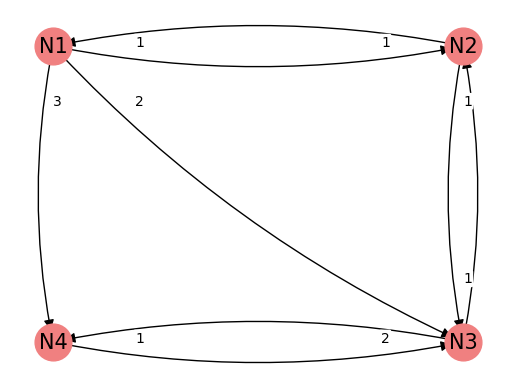


--- INÍCIO DA ANÁLISE DO GRAFO ---

Caminhos de 'N1' para 'N3':
['N1', 'N2', 'N3']
['N1', 'N3']
['N1', 'N4', 'N3']
------------------------------
O grafo 'G3' é cíclico? Sim
------------------------------
Um ciclo encontrado em 'G3': [('N1', 'N2', 0), ('N2', 'N1', 0)]


In [23]:
# CAMINHOS E CICLOS EM GRAFOS

import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# ETAPA 1: CRIAÇÃO E VISUALIZAÇÃO DO GRAFO
# -----------------------------------------------------------------------------

# Inicializa um multigrafo direcionado (permite arestas paralelas)
meu_grafo = nx.MultiDiGraph()

# Adiciona as conexões (arestas) entre os vértices, especificando o peso
meu_grafo.add_edge('N1', 'N2', weight=1)
meu_grafo.add_edge('N2', 'N1', weight=1)
meu_grafo.add_edge('N1', 'N3', weight=2)
meu_grafo.add_edge('N1', 'N4', weight=3)
meu_grafo.add_edge('N3', 'N2', weight=1)
meu_grafo.add_edge('N4', 'N3', weight=1)
meu_grafo.add_edge('N3', 'N4', weight=2)
# Adiciona uma aresta paralela de N2 para N3
meu_grafo.add_edge('N2', 'N3', weight=1)

# Define as coordenadas para o layout dos vértices
posicao_nos = {'N1': (0, 1), 'N2': (1, 1), 'N3': (1, 0), 'N4': (0, 0)}

# --- Início da Visualização ---
print("Gerando a visualização do grafo... Por favor, feche a janela do gráfico para continuar com a análise.")
fig, ax = plt.subplots()

# Desenha os nós (vértices)
nx.draw_networkx_nodes(meu_grafo, posicao_nos, node_size=700, node_color='lightcoral')

# Desenha os rótulos dentro dos nós
nx.draw_networkx_labels(meu_grafo, posicao_nos, font_size=15)

# Itera sobre as arestas para desenhá-las com curvatura
for origem, destino, chave in meu_grafo.edges(keys=True):
    # Alterna a curvatura para arestas paralelas
    curvatura = 0.1 if chave == 0 else -0.1
    estilo_conexao = f'arc3, rad={curvatura}'
    nx.draw_networkx_edges(meu_grafo, posicao_nos, edgelist=[(origem, destino)], connectionstyle=estilo_conexao, arrows=True, arrowsize=15)

# Cria e desenha os rótulos de peso nas arestas
rotulos_arestas = {(origem, destino, chave): data['weight'] for origem, destino, chave, data in meu_grafo.edges(keys=True, data=True)}
for (origem, destino, chave), peso in rotulos_arestas.items():
    # Calcula a posição do texto um pouco deslocada da origem na direção do destino
    x_origem, y_origem = posicao_nos[origem]
    x_destino, y_destino = posicao_nos[destino]
    pos_texto = (x_origem * 0.8 + x_destino * 0.2, y_origem * 0.8 + y_destino * 0.2)
    # Adiciona uma pequena variação para rótulos de arestas paralelas não sobreporem
    if chave > 0:
        pos_texto = (pos_texto[0], pos_texto[1] - 0.08)
    plt.text(pos_texto[0], pos_texto[1], s=peso, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'), zorder=1)

plt.axis('off')
plt.show() # O código pausa aqui até a janela do gráfico ser fechada

# -----------------------------------------------------------------------------
# ETAPA 2: ANÁLISE DE CAMINHOS E CICLOS (EXECUTADA APÓS A VISUALIZAÇÃO)
# -----------------------------------------------------------------------------
print("\n--- INÍCIO DA ANÁLISE DO GRAFO ---\n")

# Encontrando caminhos (ajustado para nós existentes)
print("Caminhos de 'N1' para 'N3':")
for path in nx.all_simple_paths(meu_grafo, source='N1', target='N3'):
    print(path)
print("-" * 30)

# Verificando a existência de ciclos (lógica corrigida)
# A função retorna True se o grafo FOR acíclico (NÃO tiver ciclos)
is_acyclic = nx.is_directed_acyclic_graph(meu_grafo)
# A pergunta é "O grafo é cíclico?", então a resposta é 'Sim' se NÃO for acíclico.
print(f"O grafo 'G3' é cíclico? {'Sim' if not is_acyclic else 'Não'}")
print("-" * 30)

# Identificando um ciclo (se houver)
try:
    cycle = nx.find_cycle(meu_grafo)
    print("Um ciclo encontrado em 'G3':", cycle)
except nx.NetworkXNoCycle:
    print("'G3' é acíclico.")
